##### Zaimportowanie pakietów 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

##### Załadowanie ramki danych

In [10]:
data = pd.read_csv('australia.csv')
data.shape

(56420, 18)

In [14]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

In [9]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


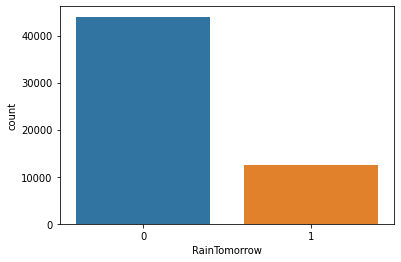

In [33]:
# rozkład zmiennej celu
sns.countplot('RainTomorrow', data=data)

# 1. Podział danych na zbiór treningowy i testowy

In [85]:
# zmienna celu to 'RainTomorrow'
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop('RainTomorrow', axis=1), data['RainTomorrow'], test_size = 0.20)

# standaryzacja bedzie potrzebna pozniej do Regresji logistycznej
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Klasyfikatory

LogisticRegression
----------

wybrane hiperparametry:
- **penalty** : str, 'l1' or 'l2', default: 'l2' (norma kary) , solvery 'newton-cg', 'sag', 'lbfgs' są do tylko 'l2'.
- **tol** : float, default: 1e-4 (Tolerance for stopping criteria)
- **C** : float, default: 1.0 (Inverse of regularization strength; must be a positive float, smaller values specify stronger regularization)
- **max_iter** : int, default: 100 Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.
- **solver** : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default: 'liblinear' (Algorithm to use in the optimization problem)

    SCALER! 'sag' and 'saga' fast convergence is only guaranteed on
    features with approximately the same scale. You can
    preprocess the data with a scaler from sklearn.preprocessing.

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and
        'saga' are faster for large ones.
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'
        handle multinomial loss; 'liblinear' is limited to one-versus-rest
        schemes.
    - 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty, whereas
        'liblinear' and 'saga' handle L1 penalty.

In [86]:
# model
l_clf = LogisticRegression(
    penalty='l2',
    tol=0.0001,
    C=0.1,
    solver='sag',
    max_iter=1000,
)

In [87]:
# trenowanie
l_clf.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
LR_pred = l_clf.predict(X_test); print(LR_pred)

[0 1 1 ... 0 1 0]


In [91]:
LR_prob = l_clf.predict_proba(X_test)[:,1]; print(LR_prob)

[0.10007886 0.84889973 0.79208927 ... 0.0677863  0.63054713 0.01951914]


XGBoost
----------
wybrane hiperparametry:

- booster: default=gbtree - the type of model to run at each iteration. It has 2 options: gbtree (tree-based models) and gblinear (linear models)
- nthread: default to maximum number of threads available if not set, to run on all cores, value should not be entered and algorithm will detect automatically
- subsample: default=1, Denotes the fraction of observations to be randomly samples for each tree. Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Typical values: 0.5-1
- gamma: default=0. A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split. Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

In [92]:
# model
xgb_clf = xgb.XGBClassifier(
    booster = 'gbtree', 
    n_estimators = 3000, 
    learning_rate = 0.01,
    colsample_bytree = 0.8, 
    max_depth = 5, 
    gamma = 0, min_child_weight = 1, 
    subsample = 0.7, 
    random_state = 42)

In [94]:
# trenowanie
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=3000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
       validate_parameters=False, verbosity=None)

In [95]:
xgb_pred = xgb_clf.predict(X_test); print(xgb_pred)

[0 1 1 ... 0 1 0]


In [96]:
xgb_prob = xgb_clf.predict_proba(X_test)[:, 1]; print(xgb_prob)

[0.10841791 0.80952543 0.69186544 ... 0.11813407 0.5937818  0.0058959 ]


k-najbliższych sąsiadów
----------
wybrane hiperparametry:

- n_neighbors : int, optional (default = 5) Number of neighbors to use by default for :meth:`kneighbors` queries.

- weights : str or callable, optional (default = 'uniform') weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

- algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
    Algorithm used to compute the nearest neighbors:

    - 'ball_tree' will use :class:`BallTree`
    - 'kd_tree' will use :class:`KDTree`
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm
      based on the values passed to :meth:`fit` method.


In [100]:
kNB_clf = KNeighborsClassifier(
    n_neighbors=10, 
    weights='distance', 
    algorithm='auto')

In [101]:
kNB_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [102]:
kNB_pred = kNB_clf.predict(X_test); print(kNB_pred)

[0 1 0 ... 0 0 0]


In [103]:
kNB_prob = kNB_clf.predict_proba(X_test)[:, 1]; print(kNB_prob)

[0.         0.7173701  0.3152626  ... 0.31037521 0.41437436 0.        ]


SVC
----------
wybrane hiperparametry:
C : float, optional (default=1.0), Penalty parameter C of the error term.

- kernel : string, optional (default='rbf')
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable. If none is given, 'rbf' will be used. If a callable is given it is
     used to pre-compute the kernel matrix from data matrices; that matrix
     should be an array of shape ``(n_samples, n_samples)``.
- gamma : float, optional (default='auto'). Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. If gamma is 'auto' then 1/n_features will be used instead.
- tol : float, optional (default=1e-3)    Tolerance for stopping criterion.


In [125]:
 s_clf = SVC(probability=True)

In [126]:
s_clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
svc_prob = s_clf.predict_proba(X_test)[:,1]; print(svc_prob)

[0.10341155 0.92642487 0.75892146 ... 0.07522878 0.72540254 0.1079155 ]


# Wyniki

In [128]:
pd.DataFrame({"Method" : ["Regresja logistyczna", "XGBoost","KNeighbors","SVC"], 
              "Accuracy" : [accuracy_score(LR_pred, Y_test), accuracy_score(xgb_pred, Y_test), accuracy_score(kNB_pred, Y_test), accuracy_score(svc_pred, Y_test)] ,
              "Recall" : [recall_score(Y_test, LR_pred), recall_score(Y_test, xgb_pred), recall_score(Y_test, kNB_pred), recall_score(Y_test, svc_pred)],
              "Precision" : [precision_score(Y_test, LR_pred, average='macro'), precision_score(Y_test, xgb_pred, average='macro'), precision_score(Y_test, kNB_pred, average='macro'), precision_score(Y_test, svc_pred, average='macro')]})
              

,Method,Accuracy,Recall,Precision
0,Regresja logistyczna,0.849787,0.529175,0.795393
1,XGBoost,0.861131,0.559759,0.815054
2,KNeighbors,0.851117,0.529980,0.798267
3,SVC,0.779865,0.000805,0.723281


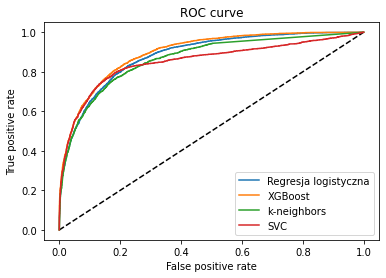

,Method,AUC
0,Regresja logistyczna,0.882808
1,XGBoost,0.897285
2,KNeighbors,0.865752
3,SVC,0.851791


In [138]:
# Krzywa ROCR
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, LR_prob) # false & true positive rates
fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, xgb_prob) # false & true positive rates
fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_test, kNB_prob) # false & true positive rates
fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_test, svc_prob) # false & true positive rates

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Regresja logistyczna')
plt.plot(fpr2, tpr2, label='XGBoost')
plt.plot(fpr3, tpr3, label='k-neighbors')
plt.plot(fpr4, tpr4, label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

pd.DataFrame({"Method" : ["Regresja logistyczna", "XGBoost","KNeighbors","SVC"], 
              "AUC" : [metrics.auc(fpr1, tpr1), metrics.auc(fpr2, tpr2), metrics.auc(fpr3, tpr3), metrics.auc(fpr4,tpr4)]})

# Wnioski
![obraz.png](https://ksopyla.com/wp-content/uploads/2019/11/image-3.png)

na obrazku jest błąd - przy drugim recall powinno być dla B!

 - precision dla klasy A, jest to stosunek poprawnie sklasyfikowanych elementów z A (TP) do wszystkich, które nasz klasyfikator oznaczył jako A (TP+FP)
 - recall dla klasy A, jest to stosunek poprawnie rozpoznanych elementów z A (TP) do wszystkich, które powinien rozpoznać, czyli do całej klasy A (TP+FN)
 
Najgorzej wypadł SVC, gdzie nawet accuracy była najmniejsza, a recall był na ekstramalnie niskim poziomie, z kolei precission nie było aż tak niskie w stosunku do reszty. Na wykresie ROC możemy zobaczyć że True Positive odzwierciedla taki wynik.
